<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset:-POS_CASH_BALANCE" data-toc-modified-id="Dataset:-POS_CASH_BALANCE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset: POS_CASH_BALANCE</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#SK_ID_PREV-and-SK_ID_CURR" data-toc-modified-id="SK_ID_PREV-and-SK_ID_CURR-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>SK_ID_PREV and SK_ID_CURR</a></span></li><li><span><a href="#SK_DPD-and-SK_DPD_DEF" data-toc-modified-id="SK_DPD-and-SK_DPD_DEF-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SK_DPD and SK_DPD_DEF</a></span></li><li><span><a href="#NAME_CONTRACT_STATUS" data-toc-modified-id="NAME_CONTRACT_STATUS-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>NAME_CONTRACT_STATUS</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#New-features-planned" data-toc-modified-id="New-features-planned-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>New features planned</a></span></li><li><span><a href="#OHE-on-latest-value-of-NAME_CONTRACT_STATUS" data-toc-modified-id="OHE-on-latest-value-of-NAME_CONTRACT_STATUS-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>OHE on latest value of NAME_CONTRACT_STATUS</a></span></li><li><span><a href="#Group-by-'SK_ID_CURR'-and-'SK_ID_PREV'" data-toc-modified-id="Group-by-'SK_ID_CURR'-and-'SK_ID_PREV'-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Group by 'SK_ID_CURR' and 'SK_ID_PREV'</a></span></li><li><span><a href="#Add-current-statuses" data-toc-modified-id="Add-current-statuses-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Add current statuses</a></span></li><li><span><a href="#Group-by-SK_ID_CURR" data-toc-modified-id="Group-by-SK_ID_CURR-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Group by SK_ID_CURR</a></span></li></ul></li><li><span><a href="#End-of-notebook" data-toc-modified-id="End-of-notebook-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>End of notebook</a></span></li></ul></div>

## Dataset: POS_CASH_BALANCE

Monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.


Table|	Row|	Description|
--------------------|---------------------|:-----------------------------------------------------------------------------------------------------------------------------------------|
POS_CASH_balance.csv|SK_ID_PREV 	      |ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
POS_CASH_balance.csv|SK_ID_CURR	          |ID of loan in our sample
POS_CASH_balance.csv|MONTHS_BALANCE	      |Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )
POS_CASH_balance.csv|CNT_INSTALMENT	      |Term of previous credit (can change over time)
POS_CASH_balance.csv|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit
POS_CASH_balance.csv|NAME_CONTRACT_STATUS |Contract status during the month
POS_CASH_balance.csv|SK_DPD	              |DPD (days past due) during the month of previous credit
POS_CASH_balance.csv|SK_DPD_DEF	          |DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import dataset

In [2]:
cwd = os.getcwd()
data_location = r"C:/Study/IUMSDS/Spring2020/I526_Applied_ML/Project/dataset/"
datafile = "POS_CASH_balance.csv"

In [3]:
df_pos_cash = pd.read_csv(os.path.join(data_location, datafile))

## EDA


************************** POS_CASH_balance ******************************

Performing basic EDA on POS_CASH_balance dataset

* The dataset has 10001358 rows and 8 columns.

* First 10 rows of the dataset:



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0



* Describing the dataset statistics:



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


None


* Check data distribution: 


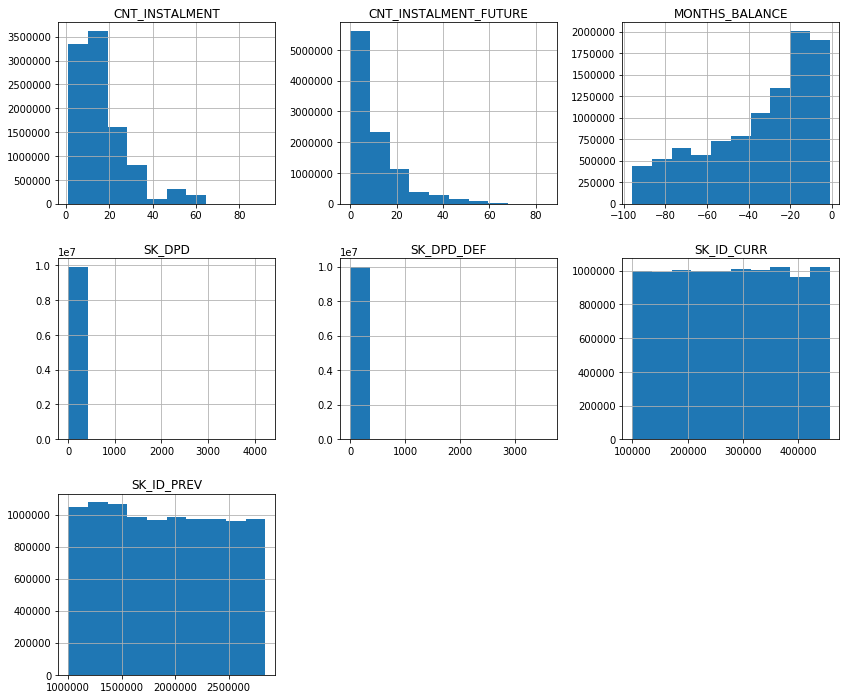

In [4]:
def basic_eda(df, datafile_name="Datafile name"):
    print(f"\n**************************",datafile_name,"******************************\n")
    print(f"Performing basic EDA on {datafile_name} dataset\n")
    print(f"* The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\n* First 10 rows of the dataset:\n")
    display(df_pos_cash.head(10))
    print("\n* Describing the dataset statistics:\n", )
    display(df.describe())
    print("\n* Fetching info of the dataset: \n")
    display(df.info())
    print("\n* Check data distribution: ")
    df.hist(figsize=(14,12))
basic_eda(df_pos_cash, 'POS_CASH_balance')

### SK_ID_PREV and SK_ID_CURR

In [66]:
print("* All records have distinct SK_ID_CURR? \t", len(df_pos_cash['SK_ID_CURR'].unique()) == df_pos_cash.shape[0])
print("* Total number of unique SK_ID_CURR   : \t", len(df_pos_cash['SK_ID_CURR'].unique()))
print("* All records have distinct SK_ID_PREV? \t", len(df_pos_cash['SK_ID_PREV'].unique()) == df_pos_cash.shape[0])
print("* Total number of unique SK_ID_PREV   : \t", len(df_pos_cash['SK_ID_PREV'].unique()))

* All records have distinct SK_ID_CURR? 	 False
* Total number of unique SK_ID_CURR   : 	 337252
* All records have distinct SK_ID_PREV? 	 False
* Total number of unique SK_ID_PREV   : 	 936325




### SK_DPD and SK_DPD_DEF

In [86]:
print("* Values of SK_DPD\n")
# display(df_pos_cash['SK_DPD'].value_counts())
display(df_pos_cash['SK_DPD'].groupby(pd.cut(df_pos_cash['SK_DPD'],[0,100,200,500,1000,2000,5000])).count())

print("* Values of SK_DPD_DEF\n")
# display(df_pos_cash['SK_DPD_DEF'].value_counts())
display(df_pos_cash['SK_DPD_DEF'].groupby(pd.cut(df_pos_cash['SK_DPD_DEF'],[0,100,200,500,1000,2000,5000])).count())

# display(df_pos_cash[df_pos_cash['SK_DPD']==4231])
# display(df_pos_cash[df_pos_cash['SK_DPD_DEF']==3595])

* Values of SK_DPD



SK_DPD
(0, 100]        177723
(100, 200]       13456
(200, 500]       28144
(500, 1000]      30111
(1000, 2000]     31903
(2000, 5000]     13890
Name: SK_DPD, dtype: int64

* Values of SK_DPD_DEF



SK_DPD_DEF
(0, 100]        109343
(100, 200]         356
(200, 500]         734
(500, 1000]       1070
(1000, 2000]      1402
(2000, 5000]      1064
Name: SK_DPD_DEF, dtype: int64

Text(0.5, 1.0, 'Distribution of SK_DPD_DEF')

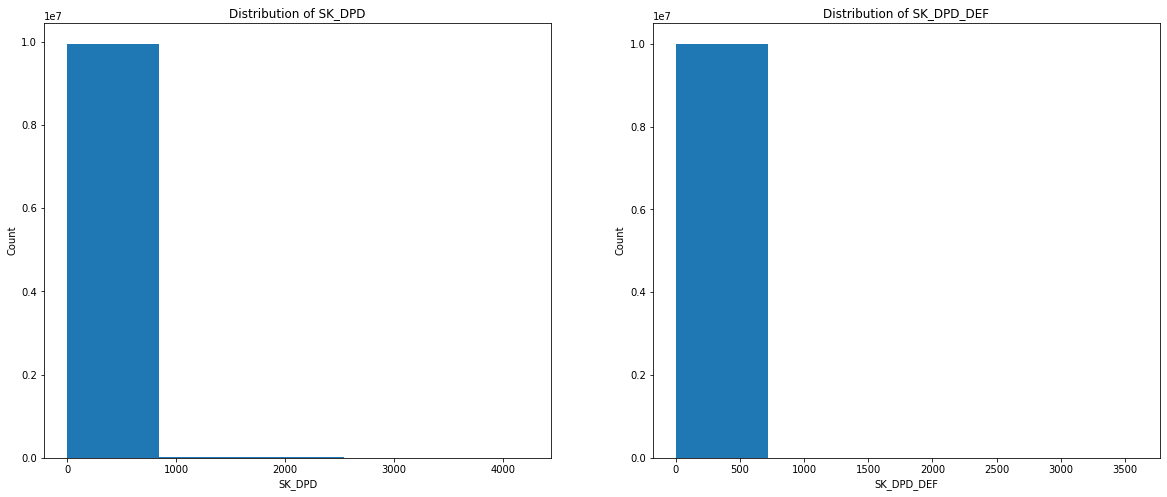

In [84]:
plt.figure(figsize=(20,8))
plt.subplot(121)
_ = plt.hist(df_pos_cash['SK_DPD'], bins=5)
plt.xlabel("SK_DPD")
plt.ylabel("Count")
plt.title("Distribution of SK_DPD")
plt.subplot(122)
_ = plt.hist(df_pos_cash['SK_DPD_DEF'], bins=5)
plt.xlabel("SK_DPD_DEF")
plt.ylabel("Count")
plt.title("Distribution of SK_DPD_DEF")

In [87]:
print(f"* SK_DPD and SK_DPD_DEF are different for {len(df_pos_cash[df_pos_cash.SK_DPD != df_pos_cash.SK_DPD_DEF])} records")

* SK_DPD and SK_DPD_DEF are different for 183880 records


### NAME_CONTRACT_STATUS

In [109]:
# This gives us latest record of each loan
# MONTHS_BALANCE has 0 for current, -1 for previous etc.
# Value of -8 in this field means 8 months back the loan was completed.

df_pos_cash_latest = df_pos_cash.loc[df_pos_cash.groupby(['SK_ID_PREV','SK_ID_CURR'])['MONTHS_BALANCE'].idxmax()]   

df_pos_cash_latest.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45995,1000001,158271,-8,2.0,0.0,Completed,0,0
2792302,1000002,101962,-50,4.0,0.0,Completed,0,0
7085917,1000003,252457,-1,12.0,9.0,Active,0,0
4078063,1000004,260094,-22,7.0,0.0,Completed,0,0
7852623,1000005,176456,-46,10.0,0.0,Completed,0,0


In [110]:
df_pos_cash_latest['NAME_CONTRACT_STATUS'].value_counts()

Completed                698421
Active                   236149
Signed                     1272
Returned to the store       304
Demand                      102
Approved                     58
Amortized debt               17
Canceled                      2
Name: NAME_CONTRACT_STATUS, dtype: int64

Text(0.5, 1.0, 'Distribution of the previous loan statuses')

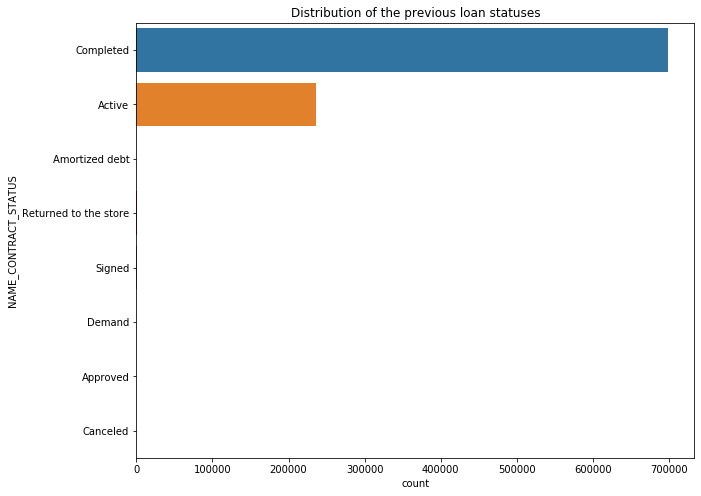

In [111]:
plt.figure(figsize=(10,8))
sns.countplot(y='NAME_CONTRACT_STATUS', data=df_pos_cash_latest)
plt.title("Distribution of the previous loan statuses")

## Feature engineering

### New features planned

- How many installments are not yet paid (CNT_INSTALMENT_FUTURE) 
- Total number of previous loans
- Total number of previous loans per status
- Min and max terms of previous loans

### OHE on latest value of NAME_CONTRACT_STATUS

In [112]:
df_pos_cash_latest_status = df_pos_cash_latest[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_STATUS']]
df_pos_cash_latest_status.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS
45995,1000001,158271,Completed
2792302,1000002,101962,Completed
7085917,1000003,252457,Active
4078063,1000004,260094,Completed
7852623,1000005,176456,Completed


In [119]:
df_dummies = df_pos_cash_latest_status['NAME_CONTRACT_STATUS'].str.get_dummies()
df_dummies.head()

,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
45995,0,0,0,0,1,0,0,0
2792302,0,0,0,0,1,0,0,0
7085917,1,0,0,0,0,0,0,0
4078063,0,0,0,0,1,0,0,0
7852623,0,0,0,0,1,0,0,0


In [121]:
df_pos_cash_latest_status = pd.concat([df_pos_cash_latest_status,df_dummies] , axis=1, sort=False)
df_pos_cash_latest_status.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
45995,1000001,158271,Completed,0,0,0,0,1,0,0,0
2792302,1000002,101962,Completed,0,0,0,0,1,0,0,0
7085917,1000003,252457,Active,1,0,0,0,0,0,0,0
4078063,1000004,260094,Completed,0,0,0,0,1,0,0,0
7852623,1000005,176456,Completed,0,0,0,0,1,0,0,0


### Group by 'SK_ID_CURR' and 'SK_ID_PREV'

In [122]:
d = {
    'SK_ID_PREV':['size'],
    'CNT_INSTALMENT_FUTURE':['min'],
    'CNT_INSTALMENT':['max']
    
}
df_agg = df_pos_cash.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg(d)
# display(df_agg.head())

df_agg.columns = df_agg.columns.droplevel()
# display(df_agg.head())
df_agg.reset_index(inplace=True)
# display(df_agg.head())
df_agg.columns=['SK_ID_CURR','SK_ID_PREV','Count','Remaining_repays','Initial_term']
display(df_agg.head())

,SK_ID_CURR,SK_ID_PREV,Count,Remaining_repays,Initial_term
0,100001,1369693,5,0.0,4.0
1,100001,1851984,4,0.0,4.0
2,100002,1038818,19,6.0,24.0
3,100003,1810518,8,0.0,12.0
4,100003,2396755,12,1.0,12.0


### Add current statuses

In [123]:
df_final = pd.merge(df_agg,df_pos_cash_latest_status,how='left')

In [125]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936325 entries, 0 to 936324
Data columns (total 14 columns):
SK_ID_CURR               936325 non-null int64
SK_ID_PREV               936325 non-null int64
Count                    936325 non-null int64
Remaining_repays         935435 non-null float64
Initial_term             935435 non-null float64
NAME_CONTRACT_STATUS     936325 non-null object
Active                   936325 non-null int64
Amortized debt           936325 non-null int64
Approved                 936325 non-null int64
Canceled                 936325 non-null int64
Completed                936325 non-null int64
Demand                   936325 non-null int64
Returned to the store    936325 non-null int64
Signed                   936325 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 107.2+ MB


In [126]:
df_final.head()

,SK_ID_CURR,SK_ID_PREV,Count,Remaining_repays,Initial_term,NAME_CONTRACT_STATUS,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
0,100001,1369693,5,0.0,4.0,Completed,0,0,0,0,1,0,0,0
1,100001,1851984,4,0.0,4.0,Completed,0,0,0,0,1,0,0,0
2,100002,1038818,19,6.0,24.0,Active,1,0,0,0,0,0,0,0
3,100003,1810518,8,0.0,12.0,Completed,0,0,0,0,1,0,0,0
4,100003,2396755,12,1.0,12.0,Active,1,0,0,0,0,0,0,0


### Group by SK_ID_CURR

In [130]:
d2 = {
    'SK_ID_PREV':['size'],
    'Remaining_repays':['sum'],
    'Initial_term': ['min','max'],
    'Active':['sum'],
    'Amortized debt':['sum'],
    'Approved':['sum'],
    'Canceled':['sum'],
    'Completed':['sum'],
    'Demand':['sum'],
    'Returned to the store':['sum'],
    'Signed':['sum']
}
df_out = df_final.groupby('SK_ID_CURR').agg(d2)

# display(df_out.head())

df_out.columns = df_out.columns.droplevel()

df_out.reset_index(inplace=True)

df_out.columns=['SK_ID_CURR','Count','Total_Remaining_repays','Min_Initial_term','Max_Initial_term','Active','Amortized debt','Approved','Canceled','Completed','Demand','Returned to the store','Signed']
display(df_out.head())

,SK_ID_CURR,Count,Total_Remaining_repays,Min_Initial_term,Max_Initial_term,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
0,100001,2,0.0,4.0,4.0,0,0,0,0,2,0,0,0
1,100002,1,6.0,24.0,24.0,1,0,0,0,0,0,0,0
2,100003,3,1.0,6.0,12.0,1,0,0,0,2,0,0,0
3,100004,1,0.0,4.0,4.0,0,0,0,0,1,0,0,0
4,100005,1,0.0,12.0,12.0,0,0,0,0,1,0,0,0


## End of notebook

<font color='blue' size=3>===================== End of NoteBook ===========================</font>

In [ ]:
print("* Number of previous loans per current loan:\n")
print("Assuming we have one entry per month for a previous loan, 12 records will correspond to 1 year worth of data:\n")
df_group_1 = pd.DataFrame(df_pos_cash.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg('size'),columns=['Months'])
df_group_1.reset_index(inplace=True)
df_group_1['Years'] = df_group_1['Months'] / 12
display(df_group_1.sort_values(by='Months',ascending=False)[:5])
display(df_group_1.sort_values(by='Months',ascending=True)[:5])


print("\n")
print("* ")

In [15]:
df_test = df_pos_cash[(df_pos_cash['SK_ID_CURR']==363269) & (df_pos_cash['SK_ID_PREV']==2832518)].sort_values(by='MONTHS_BALANCE')

In [57]:
d = {
    'SK_ID_PREV':['size'],
    'CNT_INSTALMENT_FUTURE':['min'],
    'CNT_INSTALMENT':['max'],
#     'MONTHS_BALANCE':['min']
    
}
df_agg = df_pos_cash.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg(d)
display(df_agg.head())

df_agg.columns = df_agg.columns.droplevel()
display(df_agg.head())
df_agg.reset_index(inplace=True)
display(df_agg.head())
df_agg.columns=['SK_ID_CURR','SK_ID_PREV','Count','Remaining_repays','Initial_term']
display(df_agg.head())

SK_ID_PREV CNT_INSTALMENT_FUTURE CNT_INSTALMENT
                            size                   min            max
SK_ID_CURR SK_ID_PREV                                                
100001     1369693             5                   0.0            4.0
           1851984             4                   0.0            4.0
100002     1038818            19                   6.0           24.0
100003     1810518             8                   0.0           12.0
           2396755            12                   1.0           12.0

size  min   max
SK_ID_CURR SK_ID_PREV                 
100001     1369693        5  0.0   4.0
           1851984        4  0.0   4.0
100002     1038818       19  6.0  24.0
100003     1810518        8  0.0  12.0
           2396755       12  1.0  12.0

,SK_ID_CURR,SK_ID_PREV,size,min,max
0,100001,1369693,5,0.0,4.0
1,100001,1851984,4,0.0,4.0
2,100002,1038818,19,6.0,24.0
3,100003,1810518,8,0.0,12.0
4,100003,2396755,12,1.0,12.0


,SK_ID_CURR,SK_ID_PREV,Count,Remaining_repays,Initial_term
0,100001,1369693,5,0.0,4.0
1,100001,1851984,4,0.0,4.0
2,100002,1038818,19,6.0,24.0
3,100003,1810518,8,0.0,12.0
4,100003,2396755,12,1.0,12.0


In [108]:
df_agg.shape

(936325, 5)

In [29]:
df_pos_cash[(df_pos_cash['SK_ID_CURR']==456255) & (df_pos_cash['SK_ID_PREV']==1359084)]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
895778,1359084,456255,-15,12.0,12.0,Active,0,0
3450150,1359084,456255,-12,12.0,9.0,Active,0,0
3452851,1359084,456255,-11,12.0,8.0,Active,0,0
6439473,1359084,456255,-7,8.0,0.0,Completed,0,0
7070470,1359084,456255,-9,12.0,6.0,Active,0,0
8286643,1359084,456255,-13,12.0,10.0,Active,0,0
8773156,1359084,456255,-14,12.0,11.0,Active,0,0
9166167,1359084,456255,-10,12.0,7.0,Active,0,0
9966101,1359084,456255,-8,12.0,5.0,Active,0,0


In [106]:
# 1589020	280569
df_pos_cash[(df_pos_cash['SK_ID_CURR']==280569) & (df_pos_cash['SK_ID_PREV']==1589020)].sort_values(by='MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3288072,1589020,280569,-37,6.0,6.0,Active,0,0
7739033,1589020,280569,-36,6.0,5.0,Active,0,0
2502254,1589020,280569,-35,6.0,4.0,Active,0,0
7988856,1589020,280569,-34,6.0,3.0,Active,9,9
5285694,1589020,280569,-33,6.0,2.0,Active,0,0
5010673,1589020,280569,-32,6.0,1.0,Active,9,9
7810500,1589020,280569,-31,6.0,0.0,Active,9,9
5547919,1589020,280569,-30,6.0,0.0,Demand,0,0
1784199,1589020,280569,-29,6.0,0.0,Demand,0,0
845208,1589020,280569,-28,6.0,0.0,Demand,0,0


In [25]:
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

d = {
        
      'CNT_INSTALMENT' : ['min','max'],
}

df_test.groupby('SK_ID_PREV').agg(d)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8607128,2832518,363269,-20,30.0,30.0,Active,0,0
2665681,2832518,363269,-19,30.0,29.0,Active,0,0
2961366,2832518,363269,-18,30.0,28.0,Active,0,0
3350578,2832518,363269,-17,30.0,27.0,Active,0,0
3372440,2832518,363269,-16,30.0,26.0,Active,0,0
4523176,2832518,363269,-15,30.0,25.0,Active,0,0
572955,2832518,363269,-14,30.0,24.0,Active,0,0
938981,2832518,363269,-13,30.0,23.0,Active,0,0
3879934,2832518,363269,-12,30.0,22.0,Active,0,0
4654633,2832518,363269,-11,30.0,21.0,Active,0,0


In [27]:
df_pos_cash[df_pos_cash['MONTHS_BALANCE']==-1].shape

(94908, 8)

0       9706131
1         21872
2         17358
3         14403
4         12350
         ...   
3278          1
3280          1
3282          1
3284          1
4231          1
Name: SK_DPD, Length: 3400, dtype: int64

0       9887389
1         22134
2         14690
3         11652
4          9528
         ...   
1390          1
1391          1
2410          1
1543          1
3595          1
Name: SK_DPD_DEF, Length: 2307, dtype: int64

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
7631038,1326802,188881,-1,4.0,0.0,Active,4231,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8725056,1364606,388256,-1,6.0,0.0,Demand,3595,3595


In [25]:
df_pos_cash.groupby(['SK_ID_CURR', 'SK_ID_PREV']).size()

SK_ID_CURR  SK_ID_PREV
100001      1369693        5
            1851984        4
100002      1038818       19
100003      1810518        8
            2396755       12
                          ..
456255      1359084        9
            1743609       11
            2073384        5
            2631384       25
            2729207        4
Length: 936325, dtype: int64

In [33]:
'''
i_id	i_num
1	2	1.0
2	2	NaN
3	2	NaN
4	3	NaN
5	3	5.0
'''

df = pd.DataFrame.from_dict({1:{'i_id': 2, 'i_num':1}, 2: {'i_id': 2, 'i_num': np.nan}, 3: {'i_id': 2, 'i_num': np.nan}, 4: {'i_id': 3, 'i_num': np.nan}, 5: {'i_id': 3, 'i_num': 5}}, orient='index')
display(df.groupby('i_id'))
x = df['i_id'].map(df.groupby('i_id')['i_num'].first())
x

1    1.0
2    1.0
3    1.0
4    5.0
5    5.0
Name: i_id, dtype: float64

In [58]:

# df_group_1['Months'].min()



# df_group.columns  = df_group.columns.droplevel() #drop 1 of the header row but keep the feature name header row
# result = result.reset_index(level=["SK_ID_CURR"])

,SK_ID_CURR,SK_ID_PREV,Months,Years
691497,363269,2404432,96,8.0
882446,435965,1323129,96,8.0
466532,277823,2347821,96,8.0
413016,257305,1843580,96,8.0
533914,303375,1257852,96,8.0


,SK_ID_CURR,SK_ID_PREV,Months,Years
10016,103800,1103932,1,0.083333
779967,395910,1672189,1,0.083333
879831,434960,2220885,1,0.083333
201510,176981,2001793,1,0.083333
879798,434949,2581728,1,0.083333


In [47]:
df_group

count
SK_ID_CURR SK_ID_PREV       
100001     1369693         5
           1851984         4
100002     1038818        19
100003     1810518         8
           2396755        12
...                      ...
456255     1359084         9
           1743609        11
           2073384         5
           2631384        25
           2729207         4

[936325 rows x 1 columns]

AttributeError: 'NoneType' object has no attribute 'sort'

In [27]:
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                   columns=['A', 'B', 'C'])

df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

B         C
     min  max  sum
A                 
1.0  2.0  2.0  3.0
4.0  5.0  5.0  6.0
7.0  8.0  8.0  9.0

In [51]:
df.sort_values(by='sum',ascending=False).[:10]

KeyError: 'sum'




# EDA
# Feature engineering

1) info()
2) describe()
3) nulls
4) distributions of numerical data - histograms - find ouliers
5) count plot of categorical data
6) correlations
7) common records in two datasets


```python
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)
```

```python
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))
```

```python
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])
```

In [ ]:
def 